In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# **Feasibility of Learning**

![](img/HW1-Ex6.png)

### **6. Which hypothesis g agrees the most with the possible target functions in terms of the above score?**

[a] g returns 1 for all three points.  
[b] g returns 0 for all three points.  
[c] g is the XOR function applied to x, i.e., if the number of 1s in x is odd, g returns 1; if it is even, g returns 0.  
[d] g returns the opposite of the XOR function: if the number of 1s is odd, it returns 0, otherwise returns 1.  
[e] They are all equivalent (equal scores for g in [a] through [d]).  

x6 = {1, 0, 1}  
x7 = {1, 1, 0}  
x8 = {1, 1, 1}  

h1(x6, x7, x8) = {0, 0, 0}  
h2(x6, x7, x8) = {0, 0, 1}  
h3(x6, x7, x8) = {0, 1, 0}  
h4(x6, x7, x8) = {0, 1, 1}  
h5(x6, x7, x8) = {1, 0, 0}  
h6(x6, x7, x8) = {1, 0, 1}  
h7(x6, x7, x8) = {1, 1, 0}  
h8(x6, x7, x8) = {1, 1, 1}  

[a] g(x6, x7, x8) = {1, 1, 1} (g ~ h8)

In [103]:
threePoints = 1 
twoPoints = 3
onePoint = 3

score = threePoints*3 + twoPoints*2 + onePoint*1
score

12

[b] g(x6, x7, x8) = {0, 0, 0}

In [104]:
threePoints = 1
twoPoints = 3
onePoint = 3

score = threePoints*3+twoPoints*2+onePoint
score

12

[c] g(x6, x7, x8) = XOR(x6, x7, x8) = {0, 0, 1}

In [105]:
threePoints = 1
twoPoints = 3
onePoint = 3

score = threePoints*3+twoPoints*2+onePoint
score

12

[d] g(x6, x7, x8) = "!XOR(x6, x7, x8)" = {1, 1, 0}
 
if the number of 1s is odd, it returns 0, otherwise returns 1.

In [106]:
threePoints = 1
twoPoints = 3
onePoint = 3

score = threePoints*3+twoPoints*2+onePoint
score

12

&rarr; e is the answer. They are all equivalent

# **The Perceptron Learning Algorithm**

In [107]:
def set_axis_cartesian():
    ax = plt.figure().add_subplot(1, 1, 1)
    ax.spines['left'].set_position('center')
    ax.spines['bottom'].set_position('center')
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    ax.set_xlim([-1, 1])
    ax.set_ylim([-1, 1])

Random Point 1: [ 0.1324882  -0.10842517]
Random Point 2: [0.97614937 0.44039444]


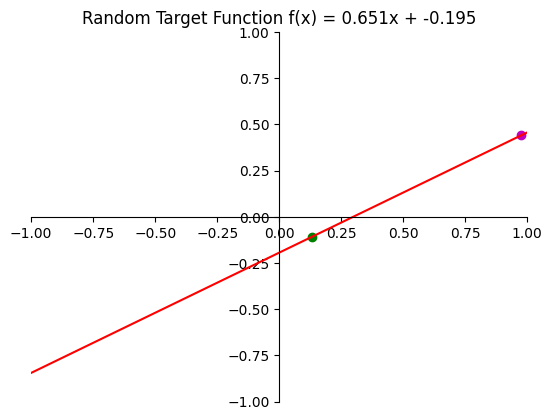

In [108]:
p1 = np.random.uniform(-1, 1, size=2)
p2 = np.random.uniform(-1, 1, size=2)

print('Random Point 1:', p1)
print('Random Point 2:', p2)

set_axis_cartesian()

plt.plot(p1[0], p1[1], 'go')
plt.plot(p2[0], p2[1], 'mo')

a = (p1[1] - p2[1]) / (p1[0] - p2[0])

b = p1[1] - a*p1[0]

x_axis = np.linspace(-1, 1, 100)
y_axis = a*(x_axis) + b
plt.plot(x_axis, y_axis, 'r', label='f(x)')

plt.title(f'Random Target Function f(x) = {a:.3f}x + {b:.3f}')

plt.show()

In [109]:
N = 10
points = np.random.uniform(-1, 1, size=(10,2))
points

array([[-0.88192757, -0.00318383],
       [ 0.01446327,  0.10442246],
       [-0.95345626, -0.88714385],
       [ 0.56320691, -0.81004867],
       [-0.21436338,  0.62429779],
       [-0.5416983 , -0.32774876],
       [ 0.41958999,  0.88935483],
       [ 0.95880721, -0.14256285],
       [ 0.67457767,  0.51405499],
       [-0.35355656, -0.26663682]])

In [110]:
# h(w, x): tính đầu ra khi biết đầu vào x và weights w.
def h(w, x):
    return np.sign(np.dot(w.T, x))

In [111]:
def is_coveraged(w, X, y):
    return np.array_equal(h(w, X), y)

In [115]:
def PLA(X, y, w_init):
    w = w_init
    N = 1000
    while not is_coveraged(w, X, y):
        N -= 1
        if N == 0:
            break
        mask = h(w, X) != y
        if np.any(mask):
            w += np.sum(y[mask, None] * X[mask], axis=0)
    return w, N

In [113]:
X = points[:, 0]
y = points[:, 1]

With `a` and `b` are the polynomial coefficients, the side of the line that a point "lands" on is given by

`sign(ax + by - d)`

![](img/HW1-line.png)

In [120]:
w, N = PLA(X, y, np.zeros(X.size))
w, N

(array([ 13457.71233326,   -220.70129205,  14549.19926403,  -8594.21653177,
          3271.06301579,   8266.00749382,  -6402.7041831 , -14630.85182509,
        -10293.67091295,   5395.07173211]),
 0)

# Ref
1. https://github.com/workflow/caltech-machine-learning-homework